# Encoding experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the generated custom dataset... 

## Header

Libraries and additional programs

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

## Initializing memory and encoding dataset in HD space

In [2]:
%run EncodingDataset.ipynb

Init_mem('normal')
#Init_mem('Rank_PF', 6)  #6, 8, 10, 12...
#Init_mem('Disting', 6)   # -> creo que habrá que modificar función CreateSemanticPointer... para admitir lista tamaño 0
#Init_mem('Intercorr_str', 6)
#Init_mem('Intercorr-Rank', 6)

# List of all concepts in dataset
Concepts = get_concepts_list() 

# Para cada modo hay que crear un diccionario,... luego de Init_mem hacer una copia de la variable global Dict y 
# llamala segun el modo... después la comparación será más fácil... 

End of memory initialization
Begining to encode dataset...
End of encoding


## Benchmarks

### a) Visualizing benchmark

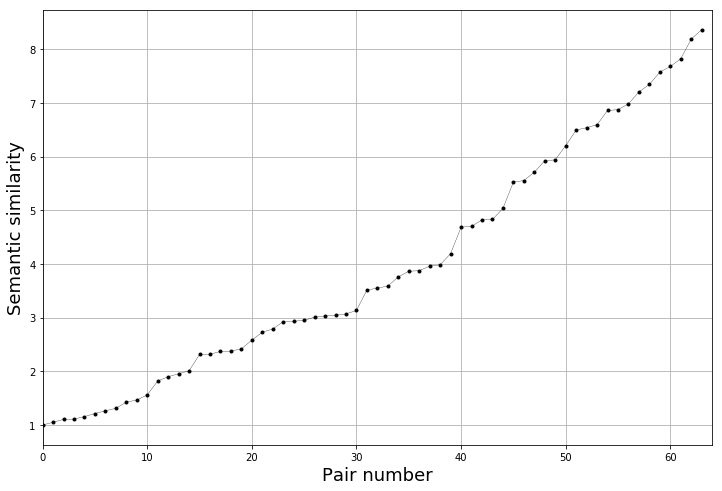

In [3]:
def ListofPairs (number):
    "It obtains the list of concept pairs rated by Humans"
    df = pd.read_excel(exp_file)
    if number > 0:
        string = 'Q' + str(number)    
    else:
        string = 'average'
    # 1) List of concepts
    ordered = df.sort_values(by=string)
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))

    # 2) Human similarity and stdev
    ordered = df.sort_values(by=string)
    L2 = list(ordered[string])
    L3 = list(ordered['stdev'])
    return L1, L2, L3

PConcepts, Hum_Sim, stdev = ListofPairs(0)

x = np.array(range(64))
stdev = np.array(map(lambda x: x*0.25, stdev))

plt.rcParams["figure.figsize"] = [12,8]

#plt.plot(Hum_Sim, fmt="k-")
plt.plot(Hum_Sim, color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  

plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png', dpi=300)


### b) Measuring similarity

In this cell we measure the similarity of each pair of concepts with each similarity measure.

In [4]:
# Create dictionary of distances for each method
Dict_HD = {}; Dict_McRae = {}; Dict_wup = {}; Dict_lch = {}; Dict_res = {}; Dict_jcn = {}

# Loop over all pairs of concepts
key = 0
print "Starting..."
for pair in PConcepts:
    print key,
    Dict_HD[key] = 1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N)
    Dict_McRae[key] = McRae_simi(pair)
    Dict_wup[key] = similarity_fun(wn.wup_similarity, pair)
    Dict_lch[key] = similarity_fun(wn.lch_similarity, pair)
    Dict_res[key] = similarity_fun(wn.res_similarity, pair, brown_ic)
    Dict_jcn[key] = similarity_fun(wn.jcn_similarity, pair, brown_ic)
    key += 1
print "\nDone!"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 
Done!


### c) Computing correlations

In [5]:
# 1) Obtain "human list", it can be the average responses or an specific one
Hum_sim =  ListofPairs(1) #or Q + #0-30
    
# 2) Obtain list of ordered concepts (keys)
keys = map(lambda x: PConcepts.index(x), Hum_sim[0])
    
# 3) Create a list of distances according to each metric by consulting the appropiate dictionary
HD_sim = [Dict_HD[x] for x in keys]
McRae_sim = [Dict_McRae[x] for x in keys]
wup_sim = [Dict_wup[x] for x in keys]
lch_sim = [Dict_lch[x] for x in keys]
res_sim = [Dict_res[x] for x in keys]
jcn_sim = [Dict_jcn[x] for x in keys]

# 4) Calculate correlations
correlations = [['HDC', pearsonr(Hum_sim[1], HD_sim)[0]], ['McRae', pearsonr(Hum_sim[1], McRae_sim)[0]],
                ['wup', pearsonr(Hum_sim[1], wup_sim)[0]], ['lch', pearsonr(Hum_sim[1], lch_sim)[0]],
                ['res', pearsonr(Hum_sim[1], res_sim)[0]], ['jcn', pearsonr(Hum_sim[1], jcn_sim)[0]]]

print sorted(correlations, key = lambda x: x[1], reverse = True)

[['HDC', 0.7104458338242616], ['McRae', 0.6579291336168837], ['res', 0.6407738417122745], ['jcn', 0.6132415801404195], ['lch', 0.5237371792119226], ['wup', 0.5024104680950027]]


## d) Plotting

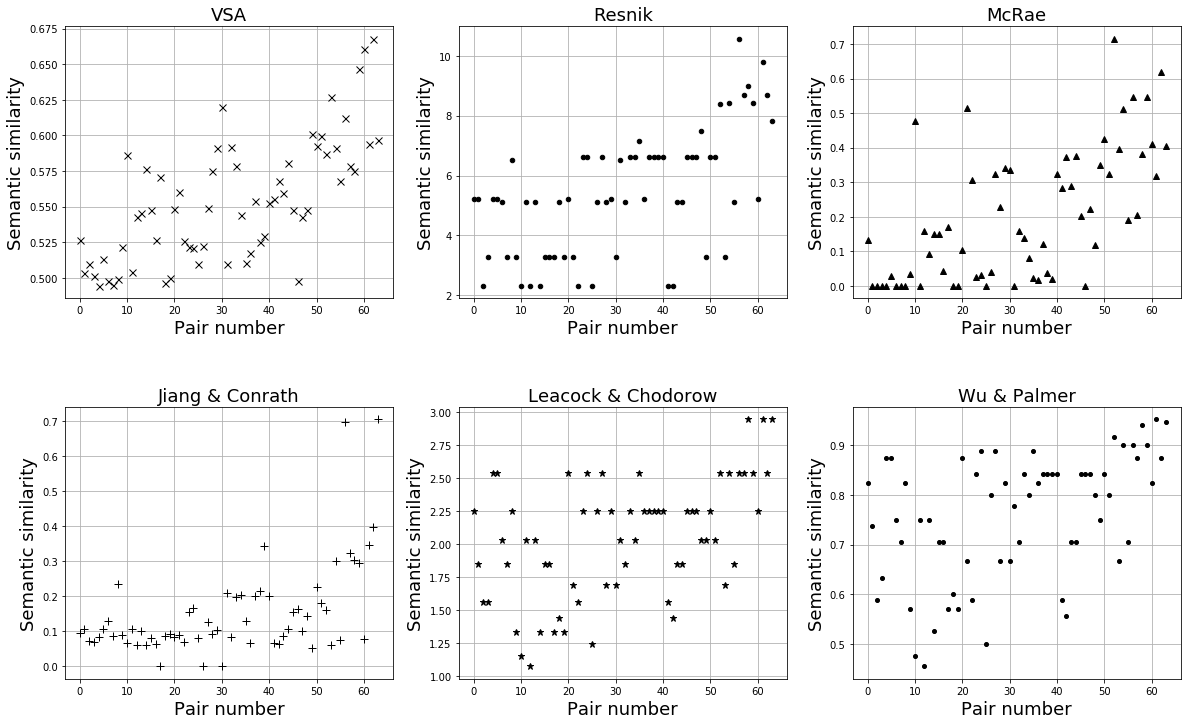

In [6]:
# Plotting
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18

plt.subplots_adjust(hspace=0.4)
plt.subplot(231)
plt.plot(HD_sim, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  

plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(res_sim, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(233)
plt.plot(McRae_sim, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(jcn_sim, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(lch_sim, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(wup_sim, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.savefig('SubPlots.png') #, dpi=1000)